In [97]:
#import packages
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as web

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#Load Data
company = 'AMZN'

#Gather stock date of the past five years
start = dt.datetime(2016,1,1)
end = dt.datetime(2021,1,31)

#These date form YAHOO
df = web.DataReader(company, 'yahoo', start, end)

df.reset_index(inplace=True,drop=False)

#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
#create features
from fastai.tabular import add_datepart
add_datepart(new_data, 'Date')
#elapsed will be the time stamp
new_data.drop('Elapsed', axis=1, inplace=True)

#split into train and validation
train = new_data[:1249]
valid = new_data[1249:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [98]:
#importing libraries
from sklearn import svm
from sklearn.pipeline import make_pipeline
scaler = MinMaxScaler(feature_range=(0, 1))

In [99]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [100]:
#Build model
model = svm.SVR(kernel='poly', C=1e3, degree=2)
model.fit(x_train, y_train)
preds = model.predict(x_valid)

In [101]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

1911.6645067519546

/Users/kejingli/opt/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/kejingli/opt/anaconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


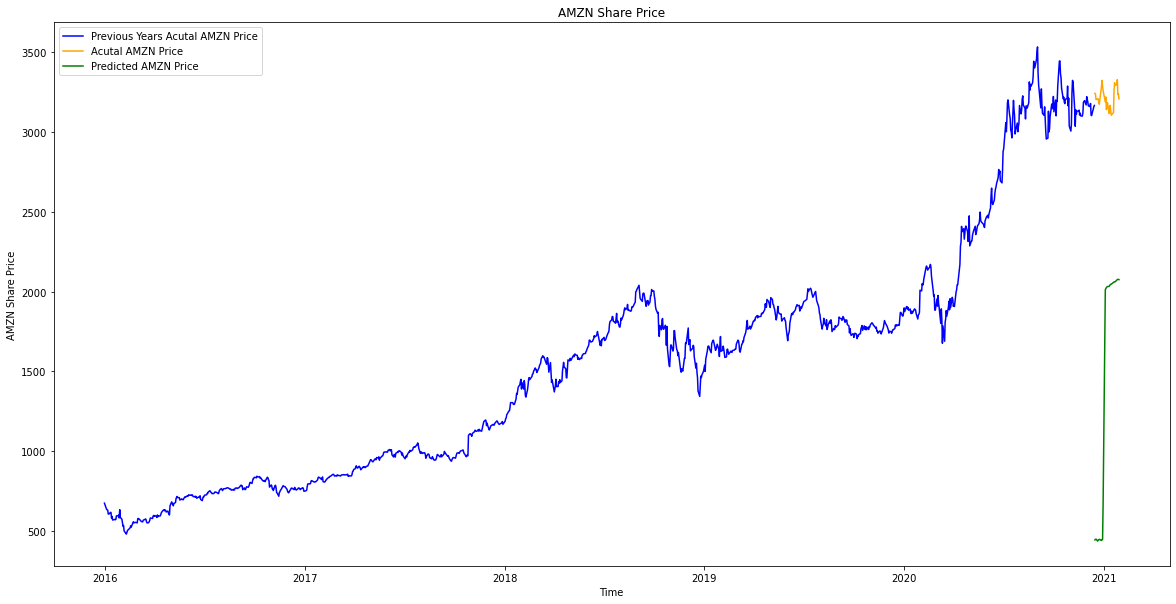

In [102]:
#plot
valid.loc[:, 'Predictions'] = preds
n = train.loc[:, 'Close']
m = valid.loc[:, 'Close']
h = valid.loc[:, 'Predictions']
new_df = df[:1249]
new_pf = df[1249:]
n.index = new_df['Date']
m.index = new_pf['Date']
h.index = new_pf['Date']
plt.plot(n, color='blue', label=f"Previous Years Acutal {company} Price")
plt.plot(m, color="orange", label=f"Acutal {company} Price")
plt.plot(h, color='green', label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

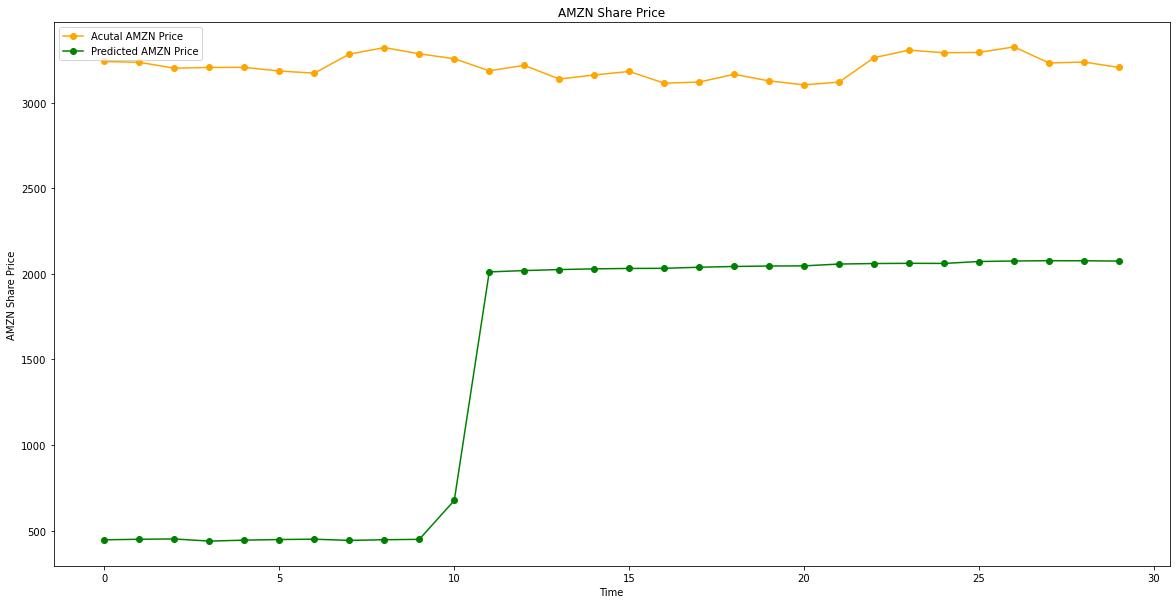

In [103]:
year = valid.loc[:, 'Day']
ap = valid.loc[:, 'Close']
pp = valid.loc[:, 'Predictions']
ap = np.array(ap)
pp = np.array(pp)
year = np.array(year)
plt.plot(ap, '-o', color="orange", label=f"Acutal {company} Price")
plt.plot(pp, '-o', color='green', label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()